In [1]:
pip install --upgrade gensim

In [2]:
from gensim.models import word2vec, FastText
import pandas as pd
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
sentences = [['write', 'program', 'find', 'factorial', 'number']
           ]

In [4]:
# train word2vec model
w2v = word2vec(sentences, min_count=1, size = 5)

print(w2v)
#word2vec(vocab=19, size=5, alpha=0.025)

TypeError: 'module' object is not callable

In [5]:
# access vector for one word
print(w2v['chocolate'])

NameError: name 'w2v' is not defined

In [6]:
from gensim.models import Word2Vec
import pandas as pd
import re

from sklearn.decomposition import PCA

from matplotlib import pyplot as plt
import plotly.graph_objects as go

import numpy as np

import warnings
sentences = [['write', 'program', 'find', 'factorial', 'number']]

# train word2vec model
w2v = Word2Vec(sentences, min_count=1, vector_size=5)

print(w2v)


Word2Vec<vocab=5, vector_size=5, alpha=0.025>


In [7]:
# access vector for one word
print(w2v.wv['write'])


[0.14623532 0.10140524 0.13515386 0.01525731 0.12701781]


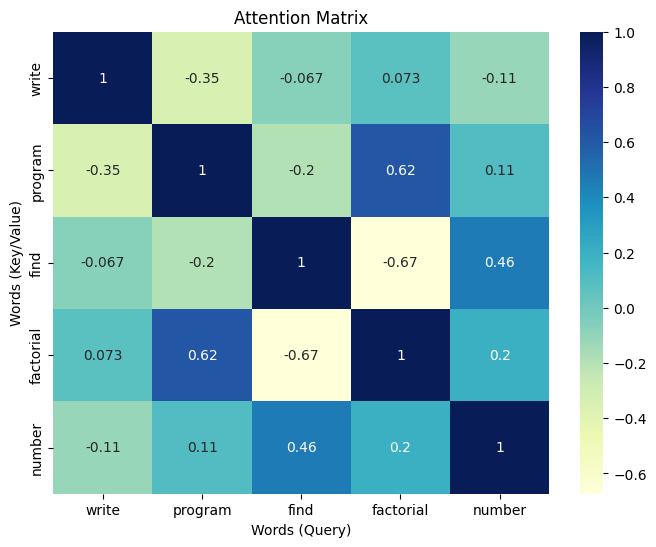

In [12]:
attention_matrix = np.zeros((len(sentences[0]), len(sentences[0])))

for i, word_i in enumerate(sentences[0]):
    for j, word_j in enumerate(sentences[0]):
      
        query = w2v.wv[word_i]
        key = w2v.wv[word_j]
        attention_scores = np.dot(query, key) / (np.linalg.norm(query) * np.linalg.norm(key))

        attention_matrix[i][j] = attention_scores

plt.figure(figsize=(8, 6))
sns.heatmap(attention_matrix, annot=True, cmap="YlGnBu", xticklabels=sentences[0], yticklabels=sentences[0])
plt.title("Attention Matrix")
plt.xlabel("Words (Query)")
plt.ylabel("Words (Key/Value)")
plt.show()

In [ ]:
from transformers import T5ForConditionalGeneration, AutoTokenizer

checkpoint = "Salesforce/codet5p-220m-py"
device = "cuda" # for GPU usage or "cpu" for CPU usage

tokenizer = AutoTokenizer.from_pretrained(checkpoint)
model = T5ForConditionalGeneration.from_pretrained(checkpoint).to(device)

inputs = tokenizer.encode("def add(a,b):  ", return_tensors="pt").to(device)
outputs = model.generate(inputs, max_length=10)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))
# ==>     print('Hello World!')

tokenizer_config.json:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/703k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/294k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/12.5k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/771 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/446M [00:00<?, ?B/s]


    print("Hello World!")


In [ ]:
inputs = tokenizer.encode("python code to reverse a list", return_tensors="pt").to(device)
outputs = model.generate(inputs, max_length=100)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))



list1 = [1,2,3,4,5,6,7,8,9]
list2 = list1[::-1]
print(list2)



In [ ]:
inputs = tokenizer.encode("python code to print list of files in current directory", return_tensors="pt").to(device)
outputs = model.generate(inputs, max_length=100)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))



import os

for root, dirs, files in os.walk('.'):
    for file in files:
        print(os.path.join(root, file))



In [16]:
pip install astor


In [20]:
# import ast
# import graphviz

# # Factorial function in Python
# code = """
# def factorial(n):
#     if n == 0:
#         return 1
#     else:
#         return n * factorial(n-1)

# result = factorial(5)
# print(result)
# """

# # Parse the code into an AST
# tree = ast.parse(code)

# # Create a graphviz Digraph object
# dot = graphviz.Digraph()

# # Function to recursively add nodes and edges to the DOT graph
# def add_nodes_edges(node, parent=None):
#     # Generate a unique label for the node
#     label = str(type(node).__name__)
#     node_id = str(id(node))

#     # Add the node to the graph
#     dot.node(node_id, label)

#     # Add edge from parent to this node
#     if parent is not None:
#         dot.edge(parent, node_id)

#     # Recursively add child nodes and edges
#     for child_name, child_node in ast.iter_fields(node):
#         if isinstance(child_node, list):
#             for child in child_node:
#                 if isinstance(child, ast.AST):
#                     add_nodes_edges(child, node_id)
#         elif isinstance(child_node, ast.AST):
#             add_nodes_edges(child_node, node_id)

# # Add nodes and edges to the DOT graph
# add_nodes_edges(tree)

# # Render the DOT graph
# dot.render(filename='ast_graph', format='png', cleanup=True)


'ast_graph.png'

In [27]:
!pip install anytree


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.9/44.9 kB 1.0 MB/s eta 0:00:00


In [28]:
import ast
from anytree import Node, RenderTree

# Factorial function in Python
code = """
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

result = factorial(5)
print(result)
"""

# Parse the code into an AST
tree = ast.parse(code)

# Function to recursively build the tree
def build_tree(node, parent=None):
    if isinstance(node, ast.AST):
        node_name = str(type(node).__name__)
        node_obj = Node(node_name, parent=parent)
        for _, value in ast.iter_fields(node):
            if isinstance(value, list):
                for item in value:
                    build_tree(item, parent=node_obj)
            elif isinstance(value, ast.AST):
                build_tree(value, parent=node_obj)

# Build the AST tree
root_node = Node("Root")
build_tree(tree, parent=root_node)

# Print the tree
for pre, fill, node in RenderTree(root_node):
    print("%s%s" % (pre, node.name))


Root
└── Module
    ├── FunctionDef
    │   ├── arguments
    │   │   └── arg
    │   └── If
    │       ├── Compare
    │       │   ├── Name
    │       │   │   └── Load
    │       │   ├── Eq
    │       │   └── Constant
    │       ├── Return
    │       │   └── Constant
    │       └── Return
    │           └── BinOp
    │               ├── Name
    │               │   └── Load
    │               ├── Mult
    │               └── Call
    │                   ├── Name
    │                   │   └── Load
    │                   └── BinOp
    │                       ├── Name
    │                       │   └── Load
    │                       ├── Sub
    │                       └── Constant
    ├── Assign
    │   ├── Name
    │   │   └── Store
    │   └── Call
    │       ├── Name
    │       │   └── Load
    │       └── Constant
    └── Expr
        └── Call
            ├── Name
            │   └── Load
            └── Name
                └── Load


In [36]:
import ast
from anytree import Node, RenderTree
from collections import defaultdict

# Factorial function in Python
code = """
def factorial(n):
    if n == 0:
        return 1
    else:
        return n * factorial(n-1)

result1 = factorial(3)
result2 = factorial(5)
"""

# Parse the code into an AST
tree = ast.parse(code)

# Function to recursively build the DAG
def build_dag(node, parent=None, seen=None):
    if seen is None:
        seen = set()

    if isinstance(node, ast.AST):
        node_name = str(type(node).__name__)

        # Check if node has already been processed
        if node_name in seen:
            return
        seen.add(node_name)

        node_obj = Node(node_name)
        if parent:
            parent.children += (node_obj,)
        for _, value in ast.iter_fields(node):
            if isinstance(value, list):
                for item in value:
                    build_dag(item, parent=node_obj, seen=seen)
            elif isinstance(value, ast.AST):
                build_dag(value, parent=node_obj, seen=seen)

# Initialize root node for the DAG
root_node = Node("Root")

# Build the DAG
build_dag(tree, parent=root_node)

# Print the DAG using RenderTree
for pre, fill, node in RenderTree(root_node):
    print("%s%s" % (pre, node.name))


Root
└── Module
    ├── FunctionDef
    │   ├── arguments
    │   │   └── arg
    │   └── If
    │       ├── Compare
    │       │   ├── Name
    │       │   │   └── Load
    │       │   ├── Eq
    │       │   └── Constant
    │       └── Return
    └── Assign
        └── Call


In [45]:
import ast
from anytree import Node, RenderTree

# Expression
expr = "a = b * -c + b * -c"

# Parse the expression into AST
tree_ast = ast.parse(expr)

# Function to recursively build the AST
def build_ast(node, parent=None):
    node_name = type(node).__name__
    node_obj = Node(node_name, parent=parent)
    for child_node in ast.iter_child_nodes(node):
        build_ast(child_node, parent=node_obj)

# Initialize root node for the AST
root_node_ast = Node("Root")

# Build the AST
build_ast(tree_ast, parent=root_node_ast)

# Print the AST using RenderTree
print("AST:")
for pre, _, node in RenderTree(root_node_ast):
    print("%s%s" % (pre, node.name))


AST:
Root
└── Module
    └── Assign
        ├── Name
        │   └── Store
        └── BinOp
            ├── BinOp
            │   ├── Name
            │   │   └── Load
            │   ├── Mult
            │   └── UnaryOp
            │       ├── USub
            │       └── Name
            │           └── Load
            ├── Add
            └── BinOp
                ├── Name
                │   └── Load
                ├── Mult
                └── UnaryOp
                    ├── USub
                    └── Name
                        └── Load


In [47]:
from anytree import Node, RenderTree

# Initialize nodes for the DAG
root_node_dag = Node("Root")
node_a = Node("a", parent=root_node_dag)
node_b = Node("b", parent=root_node_dag)
node_c = Node("c", parent=root_node_dag)
node_neg_c = Node("-c", parent=root_node_dag)
node_mul_b_neg_c = Node("b * -c", parent=root_node_dag)
node_addition = Node("+", parent=root_node_dag)

# Add relationships between nodes
node_a.parent = node_addition
node_mul_b_neg_c.parent = node_addition

# Print the DAG using RenderTree
print("DAG:")
for pre, _, node in RenderTree(root_node_dag):
    print("%s%s" % (pre, node.name))


DAG:
Root
├── b
├── c
├── -c
└── +
    ├── a
    └── b * -c
